# Training data insights.

In dit notebook wordt de trainings data direct vanuit het 'Classification model + insights' notebook ingeladen om gebruikt te worden om meer inzicht te krijgen in de data kolommen en waardes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Laad de trainings data in.

De data die het model gebruikt heeft om op te trainen wordt direct daarna opgeslagen in een csv, deze csv laden wij hier in om meer over deze data te leren

In [2]:
df = pd.read_csv('X_train.csv', low_memory=False) 

## Stop type kolommen in juiste lijst.

Hier worden de verschillende typen kolommen (numeriek of categoriaal) in een lijst gestopt. Deze lijst zal later gebruikt worden om de juiste kolommen op te halen voor elke type insight.

In [3]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['float', 'int'])

## Haal verschillende numerieke waardes uit de numerieke kolommen.

Hieronder wordt voor elke numerieke kolom een lijst aan verschillende soorten measures uit de kolom gehaald.

Ook word voor elke measure een korte beschrijving gegeven.

### Numeric columns

#### Statistical measures used

**Mean:** the average value of the variable.


**Median:** the middle value of the variable when the data is ordered from smallest to largest.


**Mode:** the most frequently occurring value in the variable.


**Range:** the difference between the maximum and minimum values of the variable.


**IQR (Interquartile range):** the difference between the 75th and 25th percentiles of the variable.


**Variance:** the measure of the spread of the variable's distribution from its mean.


**Standard deviation:** the square root of variance, also a measure of the spread of the variable's distribution from its mean.


**Skewness:** the measure of the asymmetry of the distribution of the variable's data. Positive skewness indicates that the data is
skewed to the right, while negative skewness indicates the data is skewed to the left.


**Kurtosis:** the measure of the heaviness of the tails of the distribution of the variable's data. Higher kurtosis values indicate a more peaked distribution.

**Coefficient of variation (CV):** the ratio of the standard deviation to the mean, expressed as a percentage.

In [4]:
def describe_col(col):
    stats = {
        'mean': col.mean(),
        'median': col.median(),
        'mode': col.mode().iloc[0],
        'range': col.max() - col.min(),
        'IQR': col.quantile(0.75) - col.quantile(0.25),
        'variance': col.var(),
        'std_dev': col.std(),
        'skewness': col.skew(),
        'kurtosis': col.kurtosis(),
        'coef_var': col.std() / col.mean() * 100,
        'min': col.min(),
        '25%': col.quantile(0.25),
        '50%': col.quantile(0.50),
        '75%': col.quantile(0.75),
        'max': col.max()
    }
    return pd.Series(stats)

# Apply the function to selected columns of the DataFrame
stats = numeric_cols.apply(describe_col)

print(stats)

          icd_version  duur_ok_minutes  length_of_stay_days  \
mean         9.320030     9.091415e+03             6.161784   
median       9.000000     5.912800e+03             3.972917   
mode         9.000000     1.208633e+03             1.229167   
range        1.000000     5.423536e+05           296.931944   
IQR          1.000000     7.343767e+03             5.052083   
variance     0.217612     1.364252e+08            64.277724   
std_dev      0.466489     1.168012e+04             8.017339   
skewness     0.771602     6.765468e+00             6.079459   
kurtosis    -1.404647     1.157362e+02            80.994358   
coef_var     5.005232     1.284742e+02           130.113920   
min          9.000000     3.333333e-01            -0.943750   
25%          9.000000     3.171017e+03             2.072222   
50%          9.000000     5.912800e+03             3.972917   
75%         10.000000     1.051478e+04             7.124306   
max         10.000000     5.423540e+05           295.98

## Geef outliers aan.

Hieronder wordt de IQR methode gebruikt om het aantal outliers die in de data zitten weer te geven.
Ook worden de outliers in een dictionary gestopt om ze later wellicht makkelijker te kunnen verwijderen.

### The IQR method
The IQR method is a way to identify outliers based on the distribution of the data. It involves calculating the difference between the 75th and 25th percentiles of the data (i.e., the IQR) and multiplying this value by a factor (usually 1.5 or 3). Any data points that fall below the 25th percentile minus this factor times the IQR, or above the 75th percentile plus this factor times the IQR, are considered outliers.

In [5]:
outliers_dict = {}
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 3*iqr) | (df[col] > q3 + 3*iqr)][col]
    outliers_dict[col] = outliers
    num_outliers = outliers.count()
    pct_outliers = (num_outliers / len(df[col])) * 100
    print(f"Number of outliers in {col}: {num_outliers} ({pct_outliers:.2f}%)")

Number of outliers in icd_version: 0 (0.00%)
Number of outliers in duur_ok_minutes: 6204 (3.61%)
Number of outliers in length_of_stay_days: 6228 (3.62%)
Number of outliers in time_to_surgery_minutes: 1477 (0.86%)


In [6]:
outliers_dict

{'icd_version': Series([], Name: icd_version, dtype: int64),
 'duur_ok_minutes': 30        47223.850000
 48        60920.366667
 49        42754.783333
 52        44733.066667
 94        42612.883333
               ...     
 172005    61823.950000
 172023    43952.650000
 172026    90567.333333
 172029    48466.033333
 172040    50563.500000
 Name: duur_ok_minutes, Length: 6204, dtype: float64,
 'length_of_stay_days': 30        32.590972
 48        41.968750
 49        29.602083
 52        30.875000
 94        29.454167
             ...    
 172005    42.410417
 172023    30.590278
 172026    62.885417
 172029    33.196528
 172040    35.106250
 Name: length_of_stay_days, Length: 6228, dtype: float64,
 'time_to_surgery_minutes': 322       1196.383333
 427       1299.433333
 635      -1448.000000
 681      -1360.000000
 811      -1489.000000
              ...     
 171483    1332.533333
 171515    1023.450000
 171680   -1409.000000
 171849    1441.866667
 171962   -1452.000000
 Name: tim

## Verdeling van de categoriale kolommen

Hieronder wordt de categorie distributie van de categoriale kolommen weergegeven op meerdere manieren.

Categorieën die relatief weinig voorkomen, worden samengevoegd in een 'Other' categorie om de visuele representatie van de distributie overzichtelijk te houden. De procentuele drempelwaarde daarvoor kan zelf aangegeven worden verder in de code.

### Categorical columns

In [7]:
for col in object_cols:
    value_counts = df[col].value_counts(normalize=True)
    print((value_counts * 100).round().head(5))

Other       55.0
Medicare    37.0
Medicaid     8.0
Name: herkomst, dtype: float64
MARRIED     51.0
SINGLE      33.0
WIDOWED     10.0
DIVORCED     7.0
Name: marital_status, dtype: float64
WHITE                     65.0
BLACK/AFRICAN AMERICAN    12.0
UNKNOWN                    4.0
OTHER                      4.0
HISPANIC OR LATINO         2.0
Name: race, dtype: float64
25000    5.0
2724     5.0
2449     4.0
D62      2.0
E785     2.0
Name: diagnose, dtype: float64
MED      35.0
CMED     12.0
SURG     11.0
ORTHO     7.0
OBS       7.0
Name: department, dtype: float64


In [8]:
# Define the threshold for grouping the smaller categories 1 = 100%
threshold = 0.025

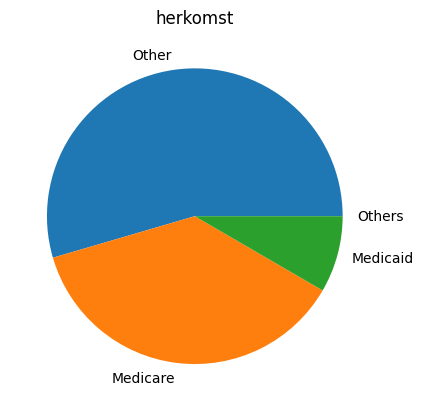

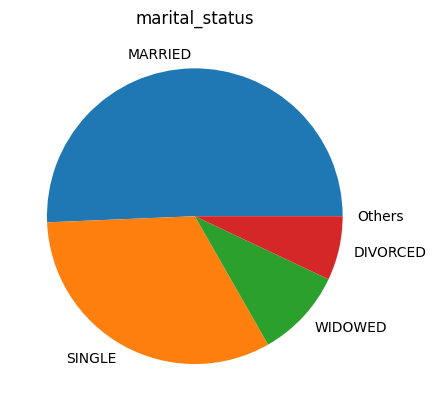

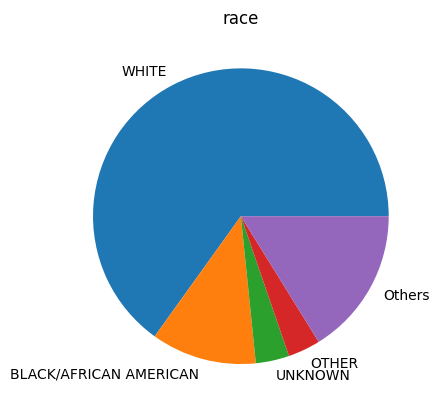

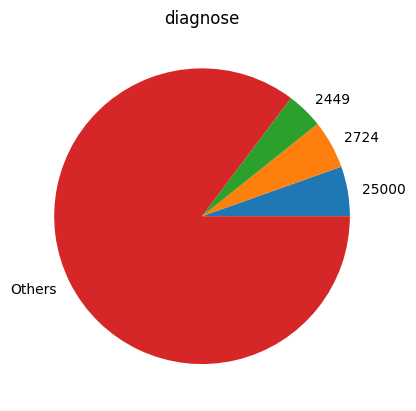

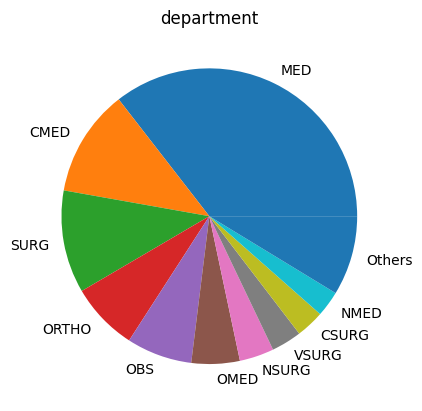

In [9]:
for col in object_cols:
    # Get the value counts for each category in the column
    value_counts = df[col].value_counts(normalize=True)
    # Filter out categories that have less than the threshold percentage
    filtered_counts = value_counts[value_counts >= threshold]
    # Sum up the counts for the remaining categories
    remaining_count = 1 - filtered_counts.sum()
    # Create a new series with the filtered categories and the "Others" category
    new_counts = pd.concat([filtered_counts, pd.Series({ 'Others': remaining_count })])
    
    plt.figure()
    plt.pie(new_counts, labels=new_counts.index)
    plt.title(col)
    plt.show()

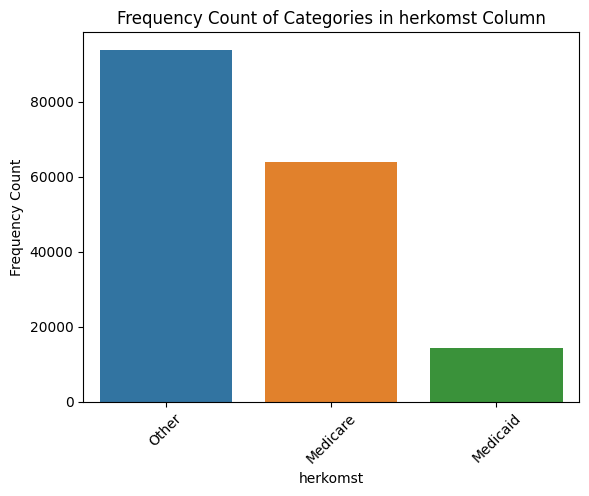

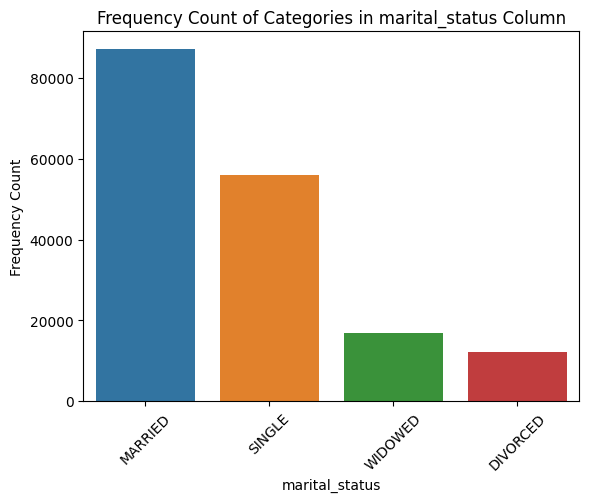

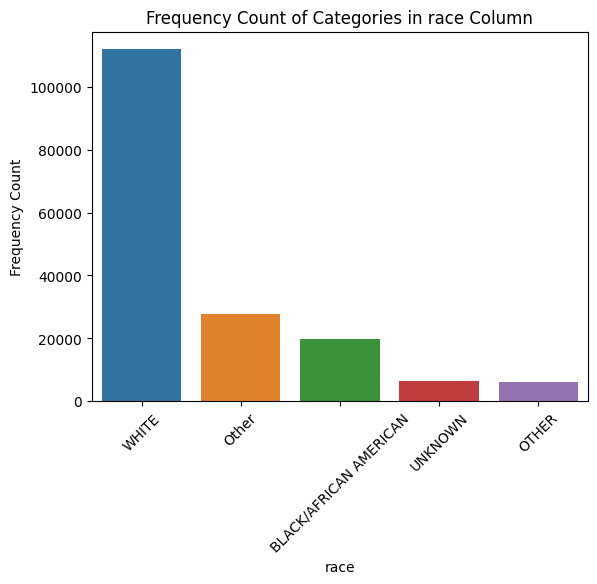

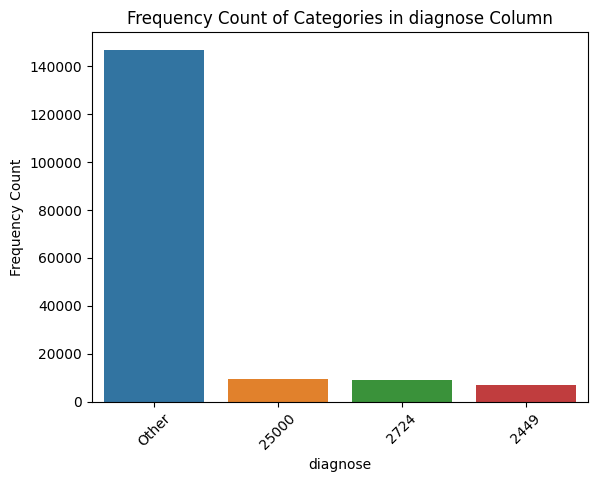

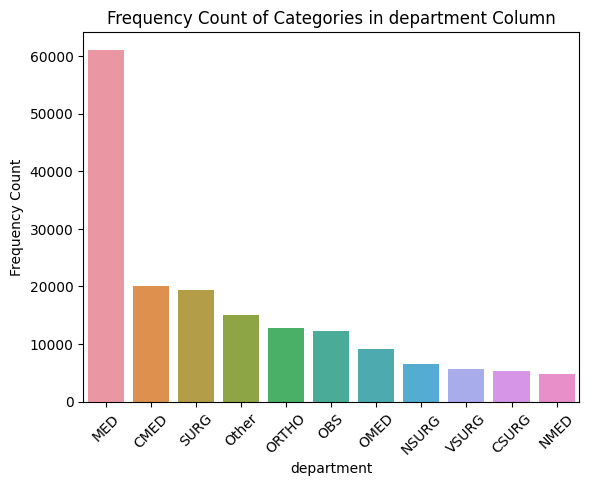

In [10]:
for col in object_cols:
    # compute the frequency count of each category in the column
    counts = df[col].value_counts()
    
    # compute the percentage of rows represented by each category
    percentages = counts / df.shape[0]
    
    # identify the categories that represent less than the threshold percentage of rows
    small_categories = percentages[percentages < threshold].index.tolist()
    
    # combine the small categories into a single "Other" category
    if small_categories:
        df[col] = df[col].apply(lambda x: 'Other' if x in small_categories else x)
    
    # compute the frequency count of each category in the column again, after grouping small categories
    counts = df[col].value_counts()
    
    # plot the result as a bar plot
    sns.barplot(x=counts.index, y=counts.values)
    
    plt.xticks(rotation=45)
    plt.title(f'Frequency Count of Categories in {col} Column')
    plt.xlabel(col)
    plt.ylabel('Frequency Count')
    plt.show()